In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv("cdc_clean_carefully_dropped_missing.csv")
df.head()

,cnty_fips,county,state,cardiac_intensive_care_units,cardiac_rehab_eligibility,cardiac_rehab_sessions,cardiac_rehab_particpation,cardiac_rehab_units,cholesterol_screen,cholesterol_medication,...,population_black,population_hispanic,population_total,population_white,income_inequality,median_houshld_income,park_access,poverty_rate,unemployment_rate,urban_rural_class
0,2020,Anchorage,AK,1.0,13.5,23.6,24.3,1.0,72.5,18.7,...,5.2,9.1,293531.0,57.9,0.430,0.430,83.0,9.5,4.4,3.0
1,2090,Fairbanks North Star,AK,1.0,13.0,29.6,33.6,1.0,70.8,17.1,...,4.2,8.0,99072.0,69.9,0.409,0.409,36.0,7.2,4.7,3.0
2,2122,Kenai Peninsula,AK,0.0,15.3,25.7,33.6,1.0,75.4,18.8,...,0.5,4.1,58464.0,79.9,0.439,0.439,52.0,10.4,6.0,4.0
3,2170,Matanuska-Susitna,AK,0.0,15.3,24.1,22.7,0.0,72.3,17.6,...,1.1,4.9,105369.0,79.2,0.422,0.422,26.0,9.6,6.1,3.0
4,6001,Alameda,CA,3.0,10.6,26.2,23.6,6.0,80.8,13.8,...,10.3,22.3,1656754.0,31.4,0.462,0.462,84.0,8.9,3.0,1.0


From our preliminary EDA, where we attempted to select variables of interest, the following variables were selected.

From the correlation analyses and the plots, we are able to deduce that the following variables can potentialy help us answer the problem statement.


**Risk Factors:**

1. cholesterol_awareness
2. diagnosed_diabetes
3. obesity
4. leisure_inactivity
5. smoking

**Healthcare opportunities:**

1. cardiac_rehab_eligibility
2. cholesterol_medication
3. cholesterol_screen
4. cardiac_rehab_sessions
5. cardiac_rehab_participation
6. cardiac_rehab_units

**Socioeconomic Factors:**

1. total_healthcare_cost_per_capita
2. air_quality 
3. park_access
4. population_age_65_plus
5. population_total
6. urban_rural_class
8. median_houshld_income 
9. poverty_rate 



We will select these variables from the dataframe df.

In [4]:
df = df[["prevalence", "cholesterol_awareness", "diagnosed_diabetes", "obesity",  "leisure_inactivity", "smoking", \
        "cardiac_rehab_eligibility", "cholesterol_medication", "cholesterol_screen", "cardiac_rehab_sessions", \
         "cardiac_rehab_particpation", "cardiac_rehab_units", "total_healthcare_cost_per_capita", \
         "air_quality", "park_access", "population_age_65_plus", "population_total", "urban_rural_class", \
         "median_houshld_income", "poverty_rate"]]
df.shape

(2310, 20)

**We convert "urban-rural-class" to dummy variables**

In [5]:
df["urban_rural_class"] = df["urban_rural_class"].map({1.0:'large_central_metro', 2.0:'large_fringe_metro', 3.0:'small_metro', 4.0:'nonmetro'})

In [6]:
# #### Convert "urban-rural-class" to categorical and get dummy variables

# df["urban_rural_class"] = df["urban_rural_class"].astype('category')
# df["urban_rural_class"].unique()

# dummy_variable_1 = pd.get_dummies(df["urban_rural_class"])

# dummy_variable_1.rename(columns={1.0:'large_central_metro', 2.0:'large_fringe_metro', 3.0:'small_metro', 4.0:'nonmetro'}, inplace=True)
# dummy_variable_1.head()

# # merge data frame "df" and "dummy_variable_1" 
# df = pd.concat([df, dummy_variable_1], axis=1)

# # drop original column "fuel-type" from "df"
# df.drop("urban_rural_class", axis = 1, inplace=True)
# df.columns

**summary statistics**

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
prevalence,2310.0,8.279524,1.657266,3.800,7.100,8.300,9.40000,14.500
cholesterol_awareness,2310.0,36.738831,3.442488,23.900,34.500,37.100,39.20000,46.000
diagnosed_diabetes,2310.0,10.382554,3.197209,2.200,8.100,9.900,12.20000,28.700
obesity,2310.0,33.489221,5.422442,11.000,30.100,33.800,37.20000,53.500
leisure_inactivity,2310.0,25.020303,5.512959,8.800,21.200,24.700,28.70000,44.400
smoking,2310.0,19.748874,3.644148,6.900,17.300,19.600,22.27500,32.600
cardiac_rehab_eligibility,2310.0,17.168918,4.748979,6.300,13.900,16.400,19.80000,51.200
cholesterol_medication,2310.0,15.530563,2.894919,9.600,13.500,15.300,17.20000,38.200
cholesterol_screen,2310.0,79.856537,2.998983,60.300,78.200,80.000,81.80000,90.100
cardiac_rehab_sessions,2310.0,24.616840,4.779962,2.000,21.900,25.200,27.80000,40.000


The above summary reveals  that the values of all the quantities are not wide apart as is obvious by the minimum and maximum values as well as the standard deviations. We can see that most of te variables are within similar scales except for total_healthcare_cost_per_capita, and population_total both of which has to be brought to similar scales as others. The dataset will be standardized before precictive analysis and modeling. Nevertheless, these numeric descriptions do not really reveal much about the distribution of the variables. Insead, we plot histograms to show these distributions. 

**Univariate Distributions**

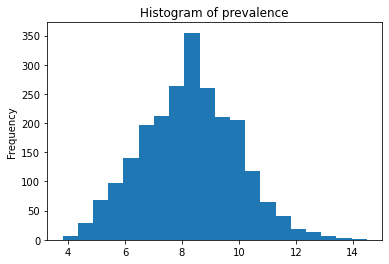

In [8]:
df["prevalence"].plot.hist(title = "Histogram of prevalence", bins = 20);
plt.show()

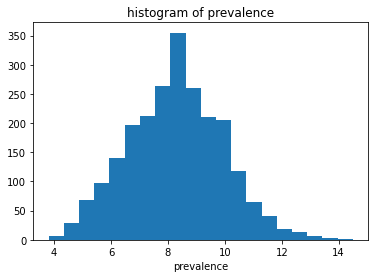

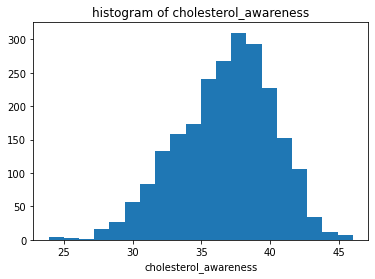

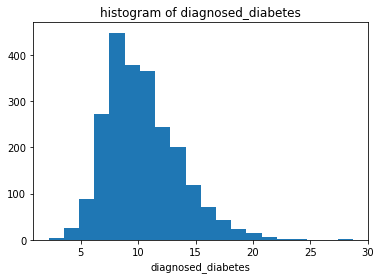

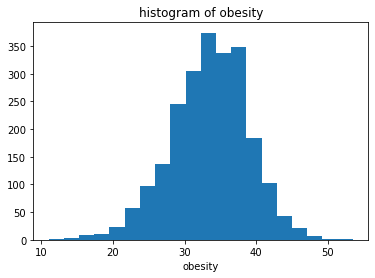

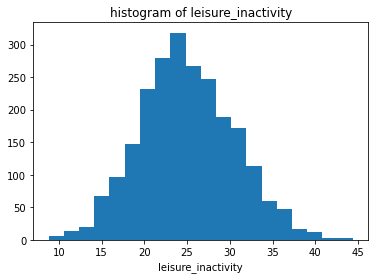

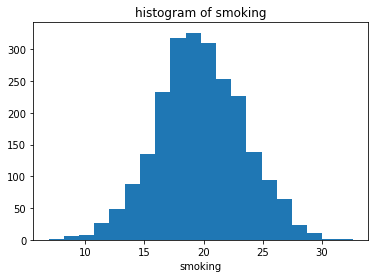

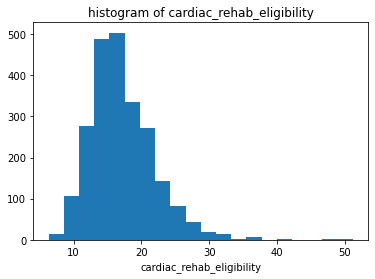

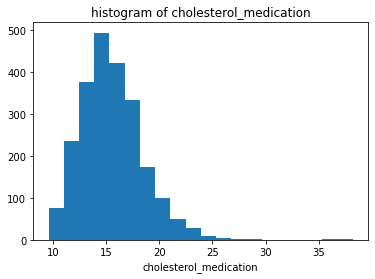

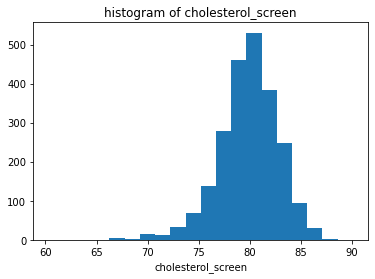

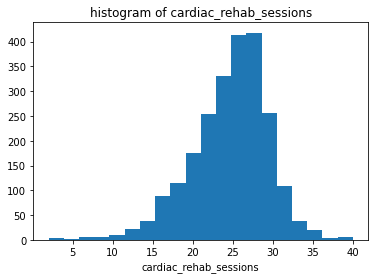

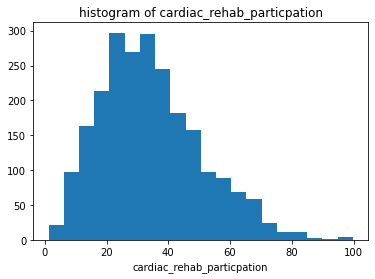

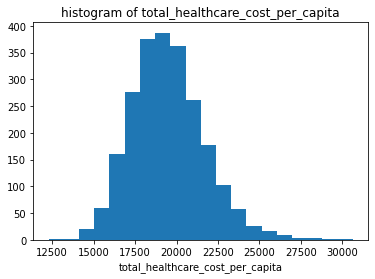

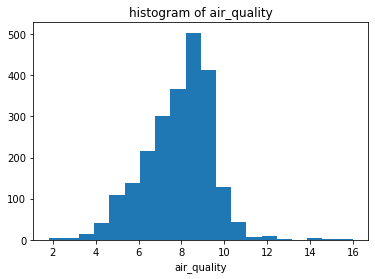

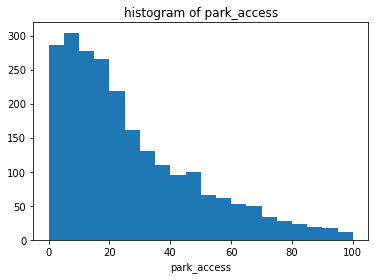

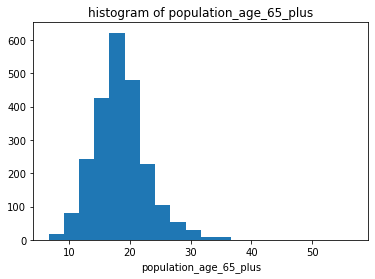

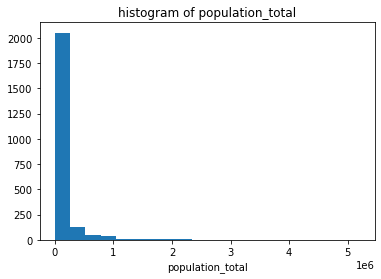

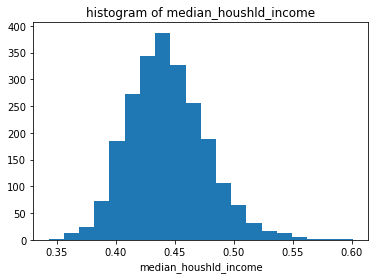

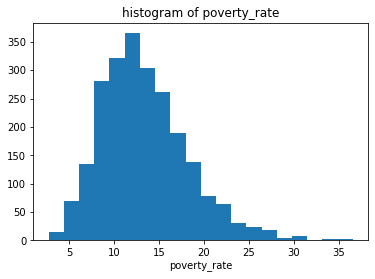

In [9]:
#dfx = df[["prevalence","cholesterol_awareness", "diagnosed_diabetes", "obesity", "leisure_inactivity", "smoking"]]
for variable in df.columns:
    if variable not in ["urban_rural_class", "no_of_hospitals", "cardiac_rehab_units"]:
        plt.hist(df[variable], bins = 20);
        plt.xlabel(variable)    
        plt.title("histogram of " + variable)
        plt.show()

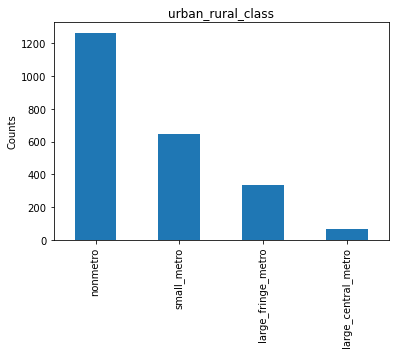

In [10]:
axs = df["urban_rural_class"].value_counts().plot.bar();
axs.set_ylabel("Counts");
axs.set_title("urban_rural_class");
plt.show()

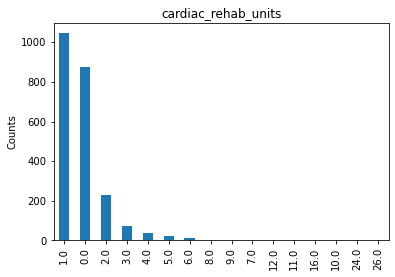

In [11]:
axs = df["cardiac_rehab_units"].value_counts().plot.bar();
axs.set_ylabel("Counts");
axs.set_title("cardiac_rehab_units");
plt.show()

**Multivariate Distributions**

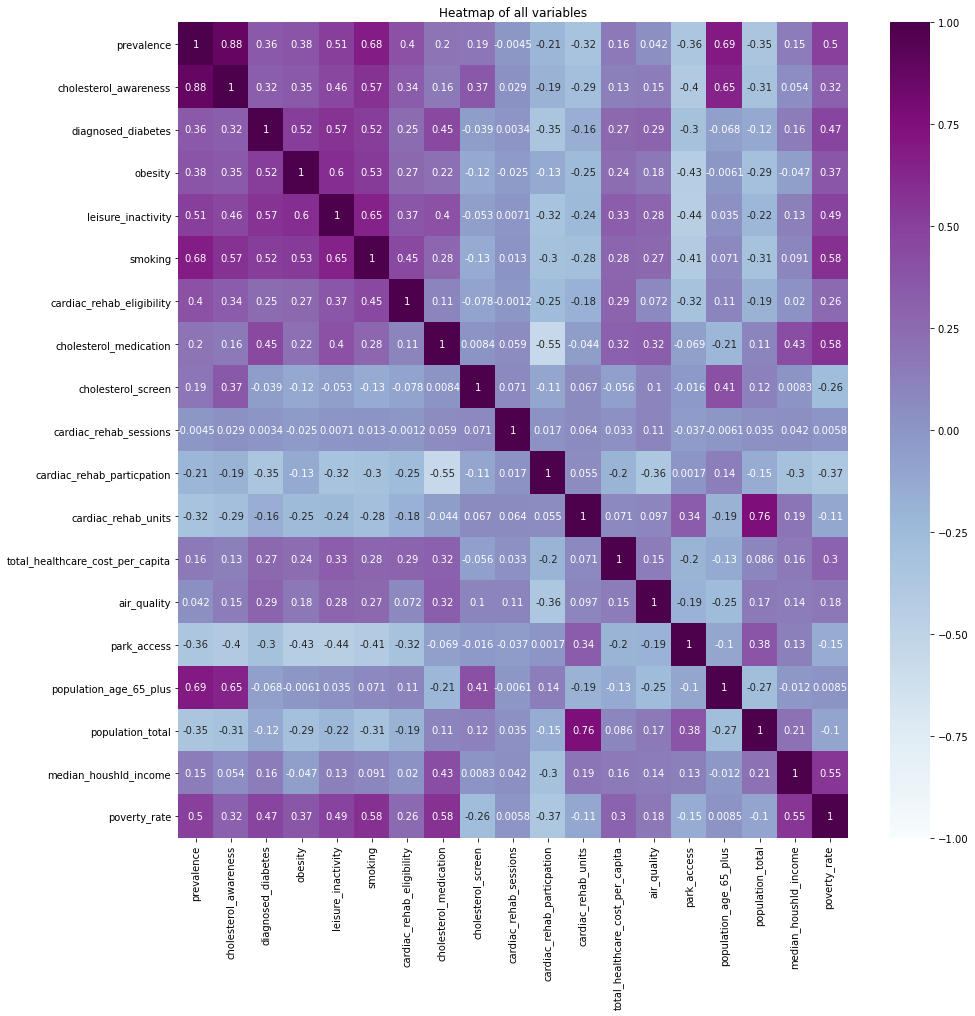

In [12]:
plt.rcParams["figure.figsize"] = (15,15);

corr_mat = df[["prevalence", "cholesterol_awareness", "diagnosed_diabetes", "obesity",  "leisure_inactivity", "smoking", \
        "cardiac_rehab_eligibility", "cholesterol_medication", "cholesterol_screen", "cardiac_rehab_sessions", \
         "cardiac_rehab_particpation", "cardiac_rehab_units", "total_healthcare_cost_per_capita", \
         "air_quality", "park_access", "population_age_65_plus", "population_total", "urban_rural_class", \
         "median_houshld_income", "poverty_rate"]].corr()
ax = sns.heatmap(corr_mat, cmap="BuPu", vmin = -1, annot = True);
ax.set_title("Heatmap of all variables");

plt.show()
